# Date string manipulations with Python

## Introduction
Throughout this notebook we are going to be practicing manipulating date strings in Python.

## Overview
In this notebook we will work with 2016-2018 lightning strike data from the National Oceanic and Atmospheric Administration (NOAA) to calculate weekly sums of lightning strikes and plot them on a graph. Then, we will calculate quarterly lightning strikes and plot them on bar graphs.

## Import packages and libraries
Before getting started we need to import the required libraries and extensions. Throughout we will be using pandas for operations, and matplotlib and seaborn for plotting.

In [1]:
# import libraries and extensions
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# import the dataset.
df = pd.read_csv('eda_manipulate_date_strings_with_python.csv')

# display the first few rows of data
df.head()

,date,number_of_strikes,center_point_geom
0,2016-08-05,16,POINT(-101.5 24.7)
1,2016-08-05,16,POINT(-85 34.3)
2,2016-08-05,16,POINT(-89 41.4)
3,2016-08-05,16,POINT(-89.8 30.7)
4,2016-08-05,16,POINT(-86.2 37.9)


### Describe the dataset
To see what is in the dataset

In [5]:
# Lets see what this data looks like.
# df.describe() # numeric variables
df.info() # to see the variable types and how many.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10479003 entries, 0 to 10479002
Data columns (total 3 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   date               object
 1   number_of_strikes  int64 
 2   center_point_geom  object
dtypes: int64(1), object(2)
memory usage: 239.8+ MB


## Create new time columns
As with similar datasets you have worked with, the `date` column data type is a string object, which limits what you can do with the data in this column. Converting the column to datetime will enable you  to work with this data much more easily.

In [6]:
# Converting the date column into datetime
df['date'] = pd.to_datetime(df['date'])

Next, let's create four new columns: `week`, `month`, `quarter` and `year`. We can do this by using the `datetime.strftime()` method of the datetime object. `strftime` is the short for 'string format time'. We will use this method on the datetime data in the `week` column, and it will extract the information we specify, formatted as a string.

To specify the information to extract, we will use strftime format codes. You can find a full list of available codes to use in the [strftime format codes documentation](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior). In this case, we will use `%Y` for year, `%V` for week number, `%q` for quarter.

**NOTE:** The following process might take a minute or two to complete.

In [7]:
# creating the column
df['week'] = df['date'].dt.strftime('%V-W%V') # extracting month from date column.
df['month'] = df['date'].dt.strftime('%V-%m') # extracting the month from date column.
df['quarter'] = df['date'].dt.to_period('Q').dt.strftime('%Y-Q%q')
df['year'] = df['date'].dt.strftime('%Y')

Lets use `head()` to check whether the columns were created as intended.

In [9]:
# Check whether the columns were created as intended.
df.head(10)

,date,number_of_strikes,center_point_geom,week,month,quarter,year
0,2016-08-05,16,POINT(-101.5 24.7),31-W31,31-08,2016-Q3,2016
1,2016-08-05,16,POINT(-85 34.3),31-W31,31-08,2016-Q3,2016
2,2016-08-05,16,POINT(-89 41.4),31-W31,31-08,2016-Q3,2016
3,2016-08-05,16,POINT(-89.8 30.7),31-W31,31-08,2016-Q3,2016
4,2016-08-05,16,POINT(-86.2 37.9),31-W31,31-08,2016-Q3,2016
5,2016-08-05,16,POINT(-97.8 38.9),31-W31,31-08,2016-Q3,2016
6,2016-08-05,16,POINT(-81.9 36),31-W31,31-08,2016-Q3,2016
7,2016-08-05,16,POINT(-90.9 36.7),31-W31,31-08,2016-Q3,2016
8,2016-08-05,16,POINT(-106.6 26.1),31-W31,31-08,2016-Q3,2016
9,2016-08-05,16,POINT(-108 31.6),31-W31,31-08,2016-Q3,2016


In [10]:
# rectify the month entry above
df['month'] = df['date'].dt.strftime('%Y-%m') # extracting the month from date column.

In [11]:
df.head()

,date,number_of_strikes,center_point_geom,week,month,quarter,year
0,2016-08-05,16,POINT(-101.5 24.7),31-W31,2016-08,2016-Q3,2016
1,2016-08-05,16,POINT(-85 34.3),31-W31,2016-08,2016-Q3,2016
2,2016-08-05,16,POINT(-89 41.4),31-W31,2016-08,2016-Q3,2016
3,2016-08-05,16,POINT(-89.8 30.7),31-W31,2016-08,2016-Q3,2016
4,2016-08-05,16,POINT(-86.2 37.9),31-W31,2016-08,2016-Q3,2016


## Plot the number of weekly lightning strikes in 2018

Next, we will plot the number of weekly lightning strikes. Let's start by filtering the original dataset to 2018. We will use the `groupby()` and `sum()` functions to get the number of strikes per week.

In [14]:
# Create a new dataframe view of just 2018 data, summed by week.
df_by_week_2018 = df[df['year'] == '2018'].groupby(['week']).sum(numeric_only=True).reset_index()
df_by_week_2018.head()

,week,number_of_strikes
0,01-W01,34843
1,02-W02,353425
2,03-W03,37132
3,04-W04,412772
4,05-W05,34972


Now we have a table of exactly what we need to plot the weekly lightning strike totals of 2018. We will use the `plt.bar()` function to plot the bar graph. Within the argument field, let's input the x-axis (the `week` column), then input the y-axis (or height) as the `number_of_strikes` column. 

We will use `plt.xlabel()`, `plt.ylabel()`, and `plt.title()` to add appropriate text to the graph.

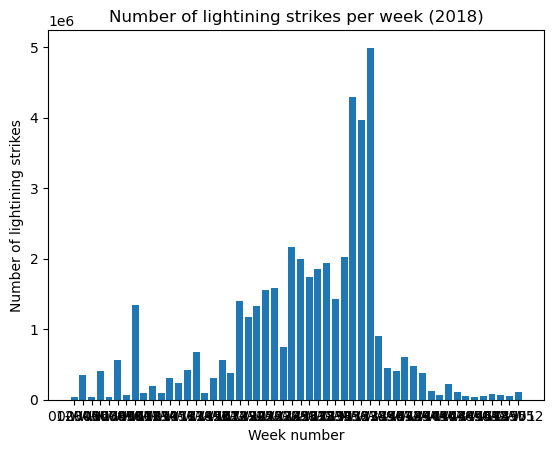

In [15]:
# Plot a bar graph of weekly strike totals in 2018
plt.bar(x=df_by_week_2018['week'], height=df_by_week_2018['number_of_strikes'])
plt.plot()
plt.xlabel('Week number')
plt.ylabel('Number of lightining strikes')
plt.title('Number of lightining strikes per week (2018)');

### Adjusting the graph size

We now have a graph, but we can't read the x-axis labels. To fix this problem, first we will make it bigger by using `plt.figure(figsize=(20, 5))`. This will change the size to 20 inches wide by 5 inches tall.

Next, we will use the `plt.xticks()` function to access the tick labels on the x-axis. Using the `rotation` and `fontsize` keyword arguments, rotate the labels and make the font smaller.

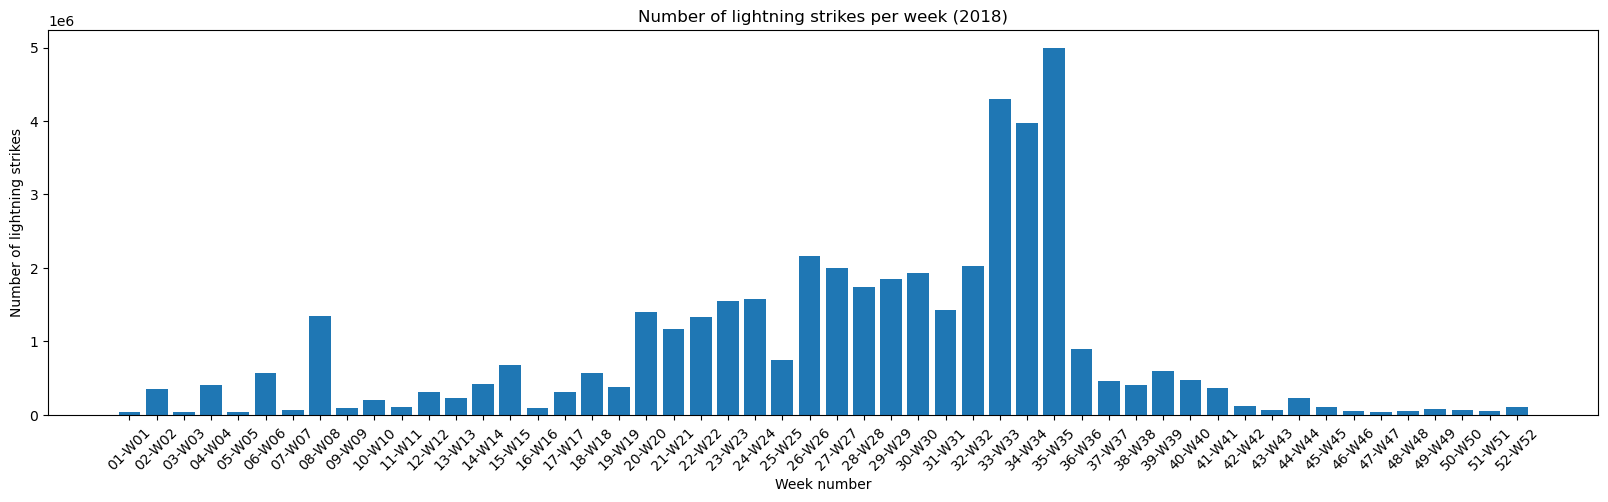

In [17]:
plt.figure(figsize=(20, 5))
plt.bar(x = df_by_week_2018['week'], height = df_by_week_2018['number_of_strikes'])
plt.plot()
plt.xlabel("Week number")
plt.ylabel("Number of lightning strikes")
plt.title("Number of lightning strikes per week (2018)")
plt.xticks(rotation=45, fontsize=10) # Rotate x-axis labels and decrease the font size.

plt.show() #

### Plot the number of quarterly lightning strikes from 2016-2018

Next, let's plot lightning strikes by quarter for the full date range of available data. For a visualization, it will be easiest to work with numbers in millions, such as 25.2 million. As an example, the following code will divide the `number_of_strikes` column by one million.

In [18]:
df_by_quarter = df['number_of_strikes'].div(1000000)
df_by_quarter.head()

0    0.000016
1    0.000016
2    0.000016
3    0.000016
4    0.000016
Name: number_of_strikes, dtype: float64

## Format the numbers

This alone does not help much, because it just moved the decimal to the left. We will need to format the numbers as well.  Let's begin by grouping the data by quarter and summing.

Then, we will create a `number_of_strikes_formatted` column in the resulting dataframe by dividing by one million but also rounding to one digit after the decimal point, converting it to a string, and adding "M" to the end to represent millions.

In [21]:
# Group 2016-2018 data by quarter and sum.
df_by_quarter = df.groupby(['quarter']).sum(numeric_only=True).reset_index()

# Format in text in millions.
df_by_quarter['no_of_strikes_formatted'] = df_by_quarter['number_of_strikes'].div(1000000).round(1).astype(str) + 'M'

# View of the first five rows of data.
df_by_quarter.head()

,quarter,number_of_strikes,no_of_strikes_formatted
0,2016-Q1,2683798,2.7M
1,2016-Q2,15084857,15.1M
2,2016-Q3,21843820,21.8M
3,2016-Q4,1969754,2.0M
4,2017-Q1,2444279,2.4M


### Add labels

Before we start plotting, let's write a function that will help label each bar in the plot with its corresponding number_of_strikes_formatted text. The function uses `plt.text()`, which is a pyplot function whose positional arguments are `x`, `y`, and `s`. `x` represents the x-axis coordinates, `y` represents the y-axis coordinates, and `s` represents the text that we want to appear at these coordinates. 

**Reference:** [pyplot documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.text.html).

In [27]:
def addlabels(x, y, labels):
    """
    Iterates over data and plots text labels above each bar of bar graph.
    """
    for i in range(len(x)):
        plt.text(i, y[i], labels[i], ha = 'center', va = 'bottom')

### Plot the bar

Next, lets plot the bar graph.

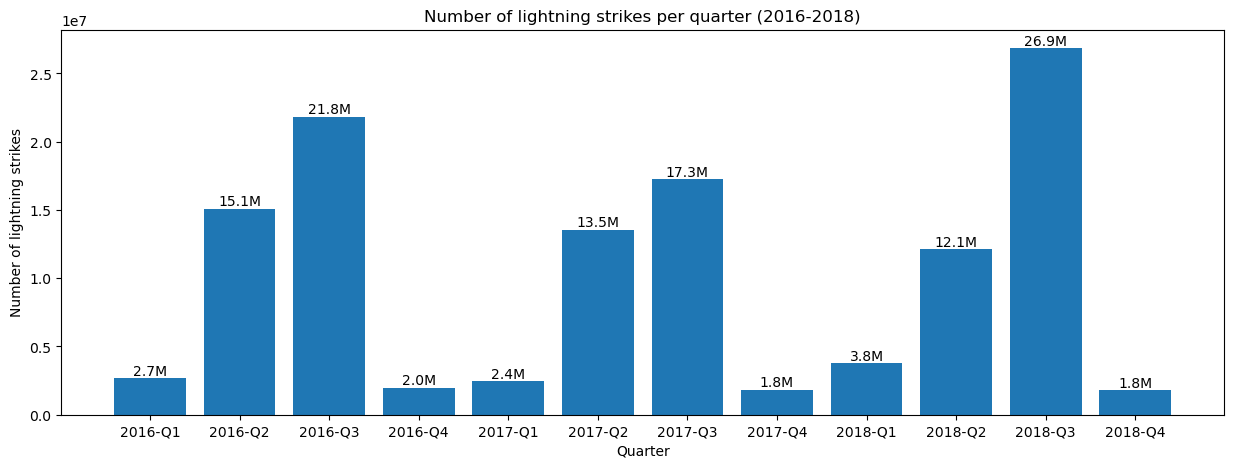

In [28]:
plt.figure(figsize=(15, 5))
plt.bar(x=df_by_quarter['quarter'], height=df_by_quarter['number_of_strikes'])
addlabels(
    df_by_quarter['quarter'],df_by_quarter['number_of_strikes'],df_by_quarter['no_of_strikes_formatted']
)
plt.plot()
plt.xlabel('Quarter')
plt.ylabel('Number of lightning strikes')
plt.title('Number of lightning strikes per quarter (2016-2018)')
plt.show()

### Create a grouped bar chart

Now, we will create a grouped bar chart to better compare year-over-year changes each quarter. We can do this by creating two new columns that break out the quarter and year from the `quarter` column. We will use the `quarter` column and take the last two characters to get `quarter_number`, and take the first four characters to get `year`.

In [29]:
# Create two new columns.
df_by_quarter['quarter_number'] = df_by_quarter['quarter'].str[-2:]
df_by_quarter['year'] = df_by_quarter['quarter'].str[:4]
df_by_quarter.head()

,quarter,number_of_strikes,no_of_strikes_formatted,quarter_number,year
0,2016-Q1,2683798,2.7M,Q1,2016
1,2016-Q2,15084857,15.1M,Q2,2016
2,2016-Q3,21843820,21.8M,Q3,2016
3,2016-Q4,1969754,2.0M,Q4,2016
4,2017-Q1,2444279,2.4M,Q1,2017


### Fill in the chart parameters

Next, fill in the bar chart parameters. 

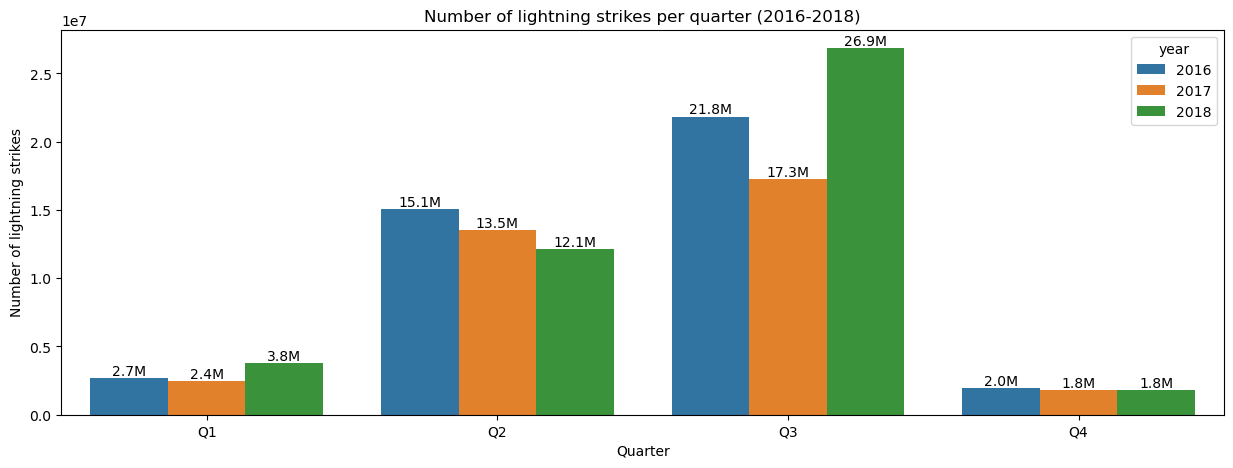

In [31]:
plt.figure(figsize = (15, 5))
p = sns.barplot(
    data = df_by_quarter,
    x = 'quarter_number',
    y = 'number_of_strikes',
    hue = 'year')
for b in p.patches:
    p.annotate(str(round(b.get_height()/1000000, 1))+'M', 
                   (b.get_x() + b.get_width() / 2., b.get_height() + 1.2e6), 
                   ha = 'center', va = 'bottom', 
                   xytext = (0, -12), 
                   textcoords = 'offset points')
plt.xlabel("Quarter")
plt.ylabel("Number of lightning strikes")
plt.title("Number of lightning strikes per quarter (2016-2018)")
plt.show()